<a href="https://colab.research.google.com/github/enzogranado/Machine-Learning-Primeiro-Lab/blob/main/C%C3%B3pia_de_Regression_of_electric_car_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id="section-one"></a>
# <b><span style='color:#f5429b'> 1. |</span> Carregando os dados

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import warnings
import seaborn as sb
warnings.filterwarnings('ignore')
import os

In [ ]:
df=pd.read_csv('/content/ElectricCarData_Clean.csv')
df.head(3)

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


In [ ]:
df.isnull().sum()

,0
Brand,0
Model,0
AccelSec,0
TopSpeed_KmH,0
Range_Km,0
Efficiency_WhKm,0
FastCharge_KmH,0
RapidCharge,0
PowerTrain,0
PlugType,0


In [ ]:
df.nunique()

,0
Brand,33
Model,102
AccelSec,55
TopSpeed_KmH,25
Range_Km,50
Efficiency_WhKm,54
FastCharge_KmH,51
RapidCharge,2
PowerTrain,3
PlugType,4


<a id="section-two"></a>
# <b><span style='color:#f5429b'> 2. |</span> Respondendo questões exploratórias

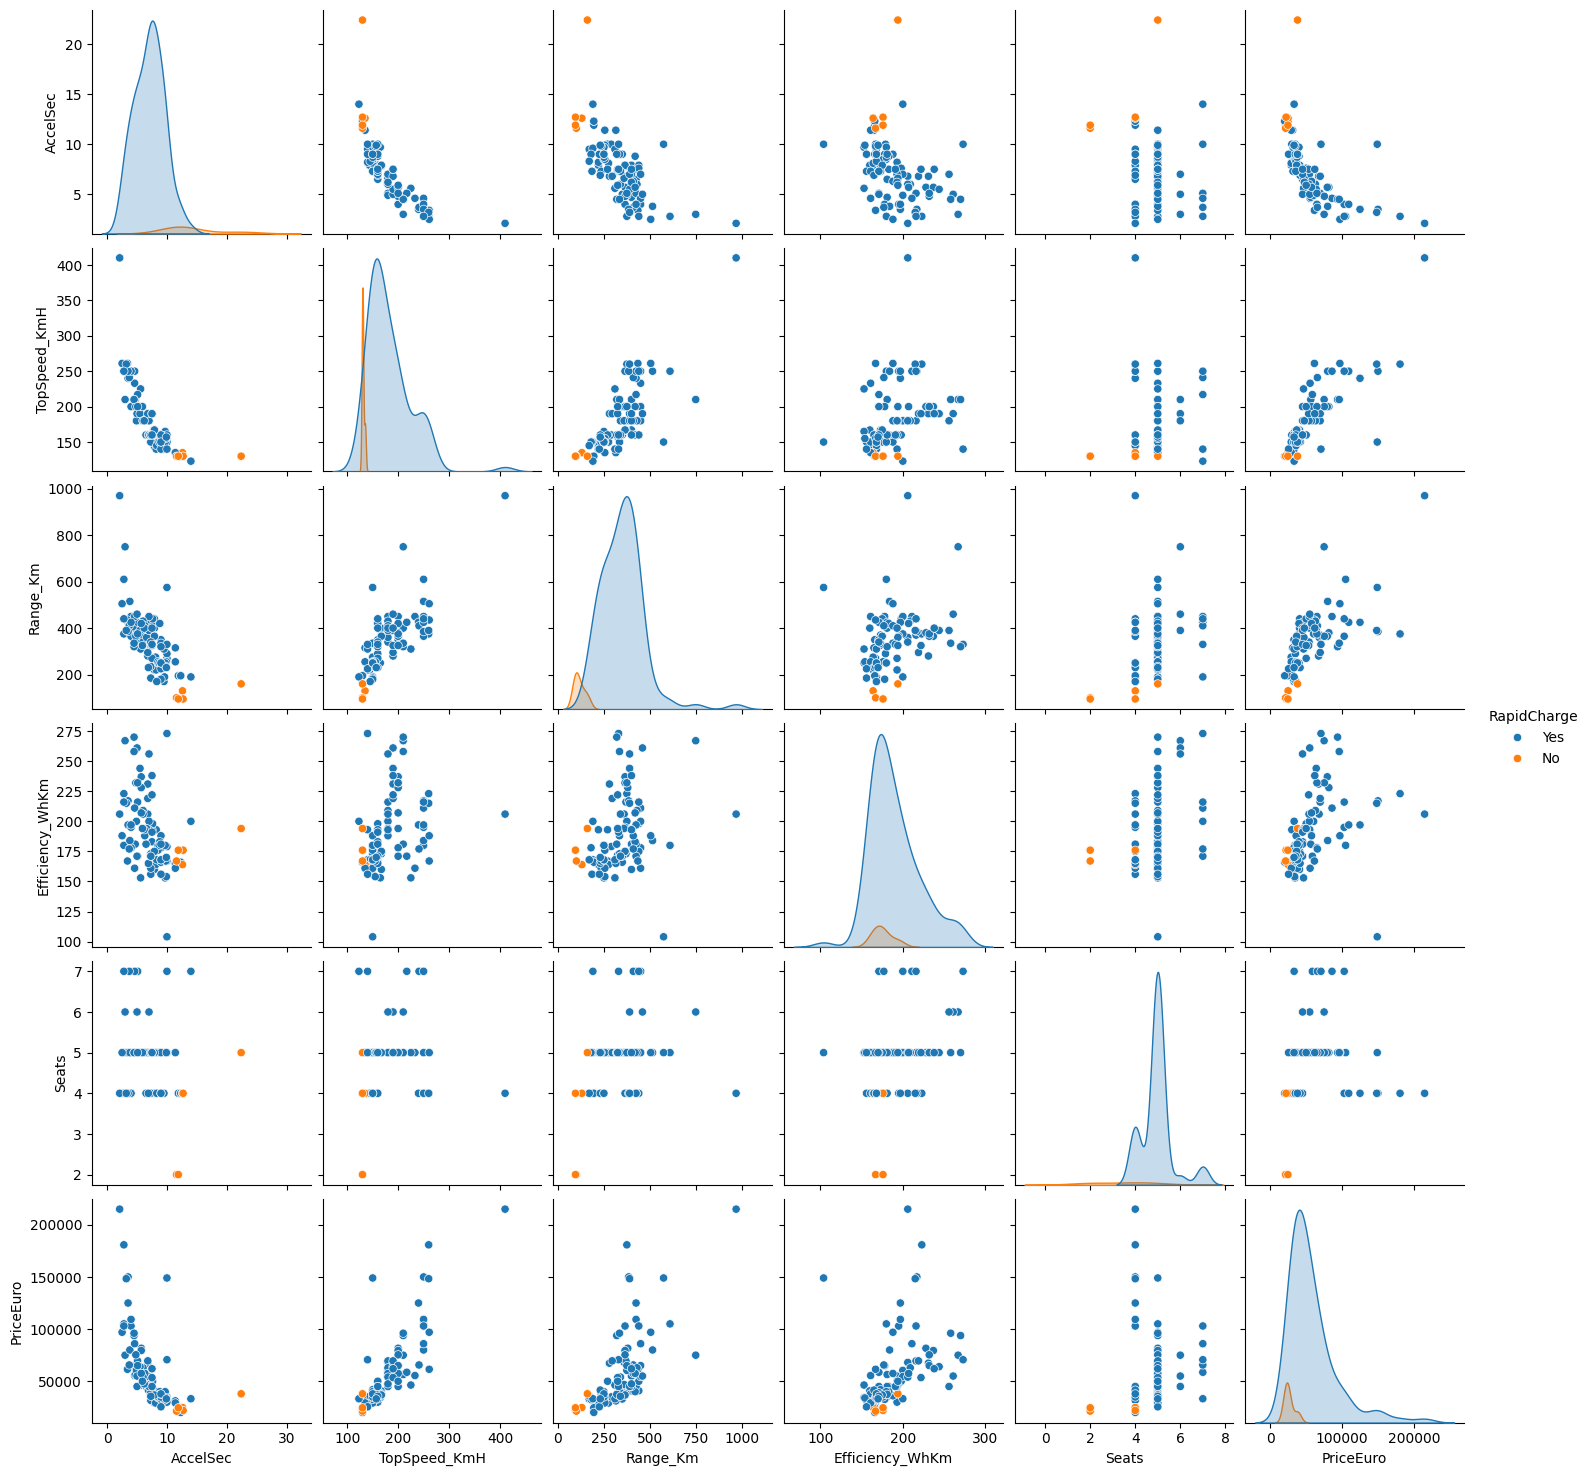

In [ ]:
sb.pairplot(df,hue='RapidCharge')

P: Qual marca tem a aceleração mais rápida?
A marca com a maior aceleração é a Renault

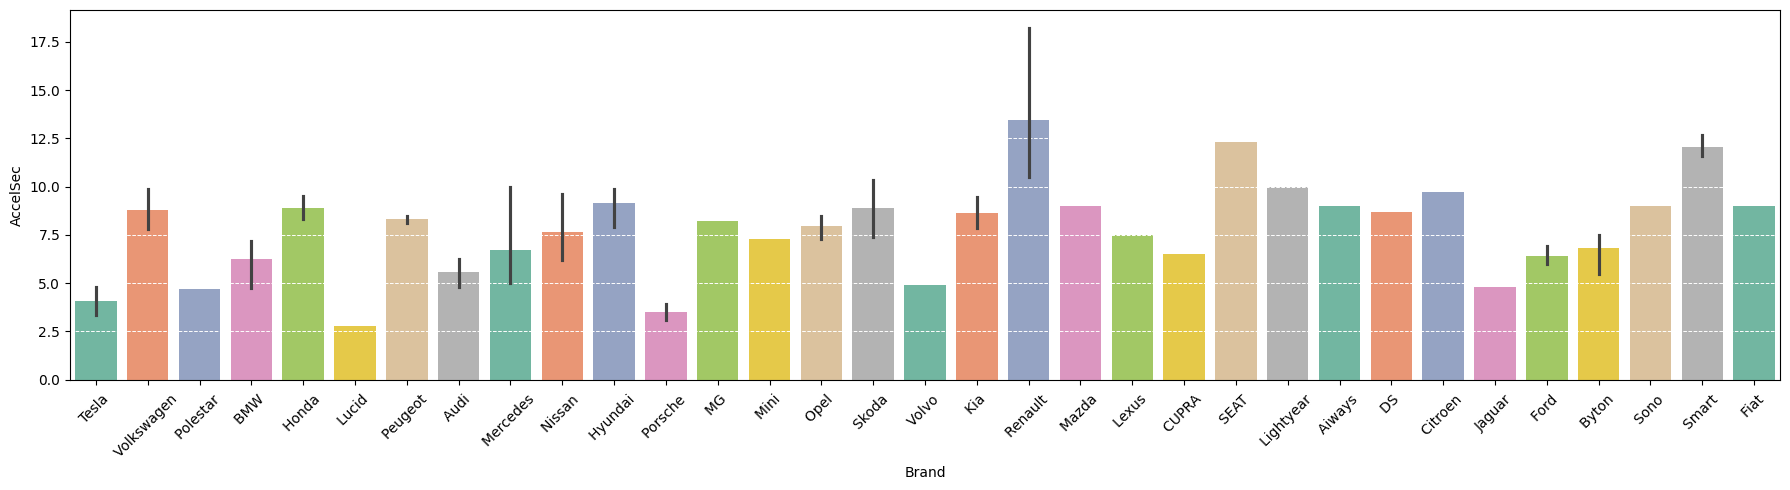

In [ ]:
plt.figure(figsize=(18,5))
ax = sb.barplot(x='Brand', y='AccelSec', data=df, palette='Set2')

ax.grid(axis='y', linestyle='--', linewidth=0.7, color='white', zorder=0)

plt.xlabel('Brand')
plt.ylabel('AccelSec')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

\P: Quais marcas tem a melhor eficiência?
 Jaguar, Bython e Audi

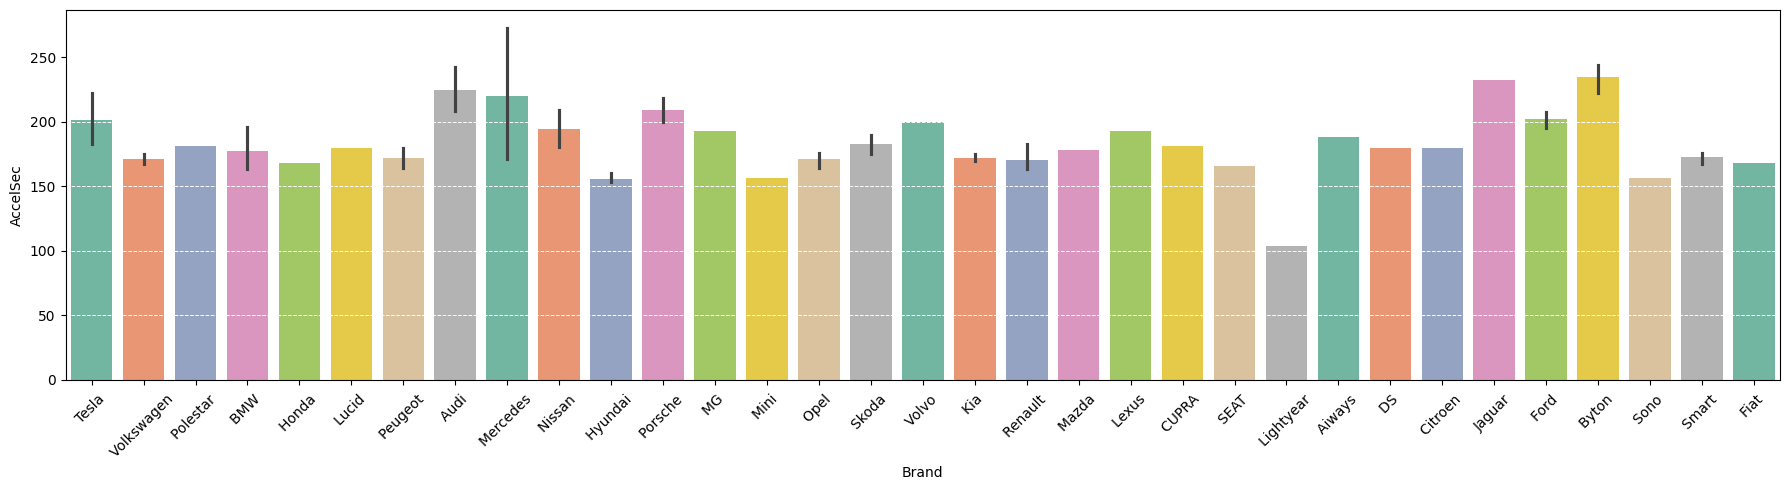

In [ ]:
plt.figure(figsize=(18,5))
ax = sb.barplot(x='Brand', y='Efficiency_WhKm', data=df, palette='Set2')

ax.grid(axis='y', linestyle='--', linewidth=0.7, color='white', zorder=0)

plt.xlabel('Brand')
plt.ylabel('AccelSec')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

P: Quais são as 3 marcas mais caras?
As 3 marcas mais caas são: Porche, Lightyear, Lucid

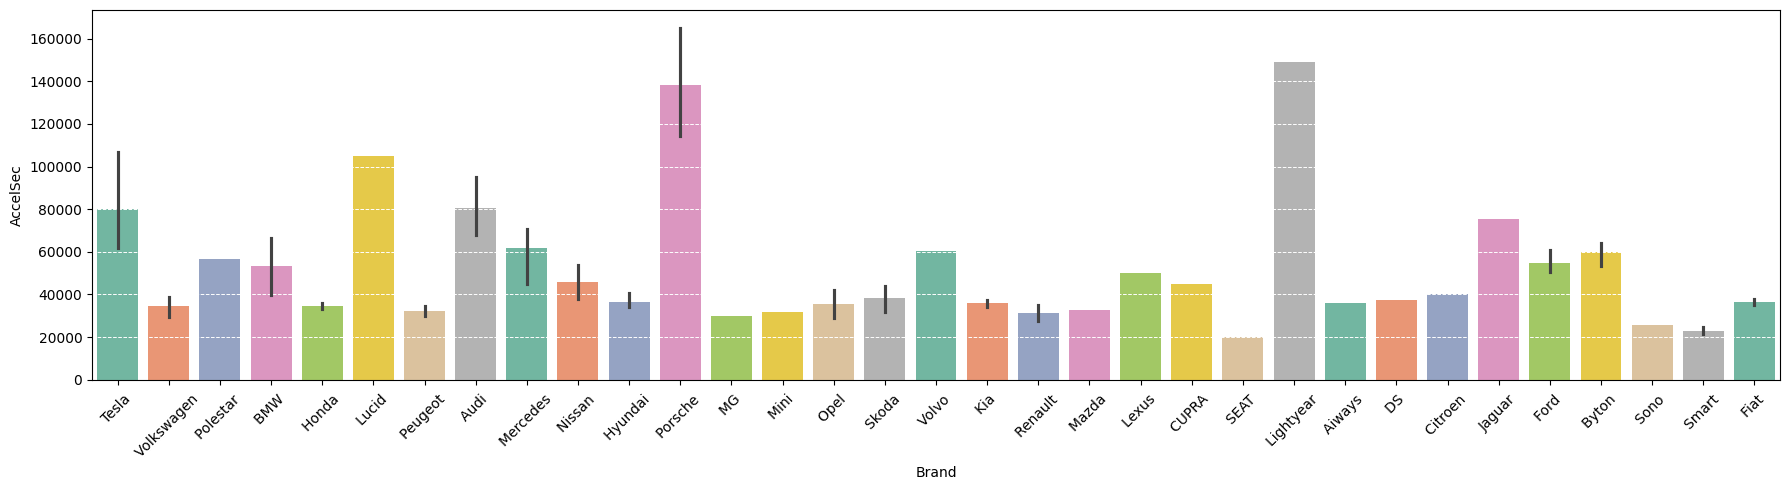

In [ ]:
plt.figure(figsize=(18,5))
ax = sb.barplot(x='Brand', y='PriceEuro', data=df, palette='Set2')

ax.grid(axis='y', linestyle='--', linewidth=0.7, color='white', zorder=0)

plt.xlabel('Brand')
plt.ylabel('AccelSec')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df2=df.copy()
df2['Brand'] = le.fit_transform(df2['Brand'])
df2['Model'] = le.fit_transform(df2['Model'])
df2['RapidCharge'] = le.fit_transform(df2['RapidCharge'])
df2['PowerTrain'] = le.fit_transform(df2['PowerTrain'])
df2['PlugType'] = le.fit_transform(df2['PlugType'])
df2['BodyStyle'] = le.fit_transform(df2['BodyStyle'])
df2['Segment'] = le.fit_transform(df2['Segment'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    int64  
 1   Model            103 non-null    int64  
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    int64  
 8   PowerTrain       103 non-null    int64  
 9   PlugType         103 non-null    int64  
 10  BodyStyle        103 non-null    int64  
 11  Segment          103 non-null    int64  
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 11.4+ KB


In [ ]:
# retirar hyphen in the FastCharge_KmH column
df2['FastCharge_KmH']=df2['FastCharge_KmH'].str.replace('-','')
df2['FastCharge_KmH'] = le.fit_transform(df2['FastCharge_KmH'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    int64  
 1   Model            103 non-null    int64  
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    int64  
 7   RapidCharge      103 non-null    int64  
 8   PowerTrain       103 non-null    int64  
 9   PlugType         103 non-null    int64  
 10  BodyStyle        103 non-null    int64  
 11  Segment          103 non-null    int64  
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 11.4 KB


P: Qual marca tem a maior quantidade de modelos?
Tesla

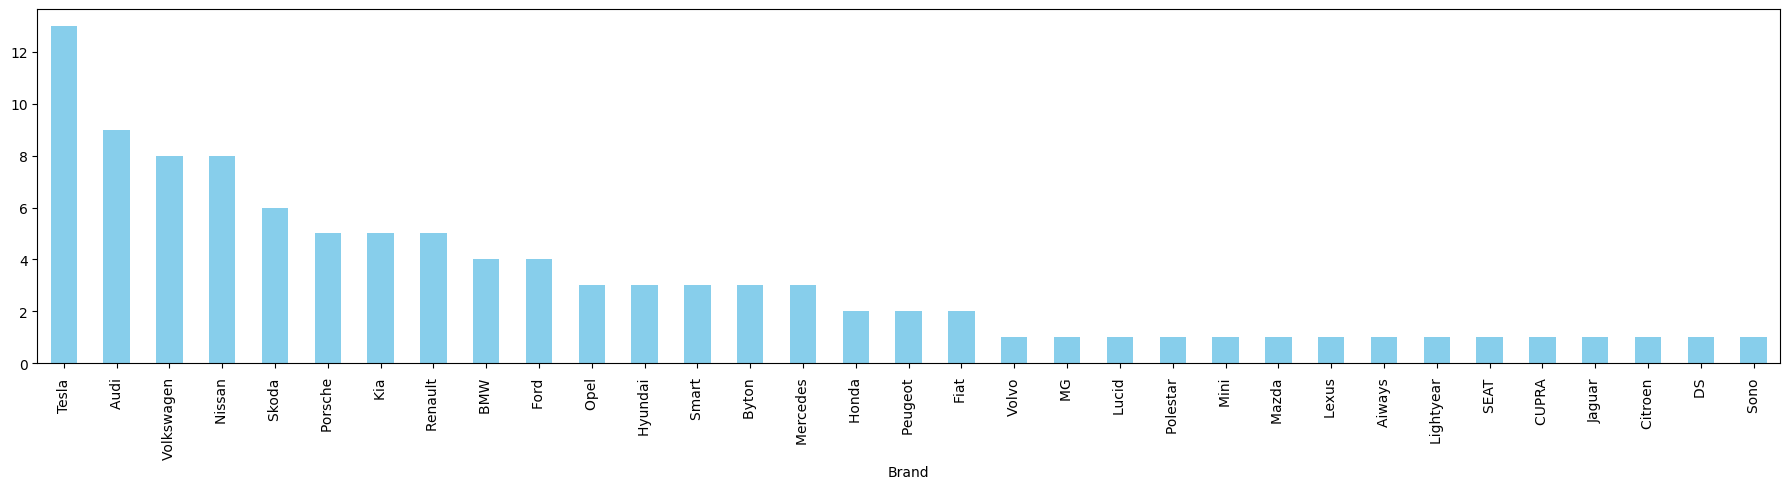

In [ ]:
plt.figure(figsize=(18, 5))  # Aumenta o tamanho da figura
df['Brand'].value_counts().plot(kind='bar', color='skyblue')

plt.tight_layout()
plt.show()

P: Como o preço está relacionado com a rapidez de recarga?
Carros mais caros tentem a ter uma recarga mais rápida

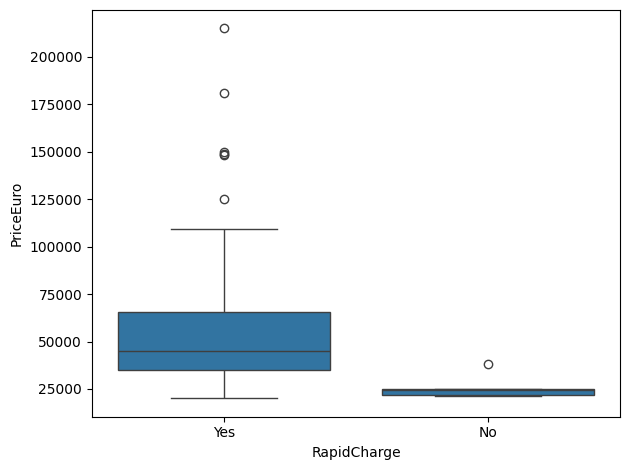

In [ ]:
sns.boxplot(y='PriceEuro',x='RapidCharge',data=df)
plt.tight_layout()
plt.show()
df['RapidCharge']=df['RapidCharge'].map({'Yes':1,'No':0})

<a id="section-three"></a>
# <b><span style='color:#f5429b'> 3. |</span> Regressão

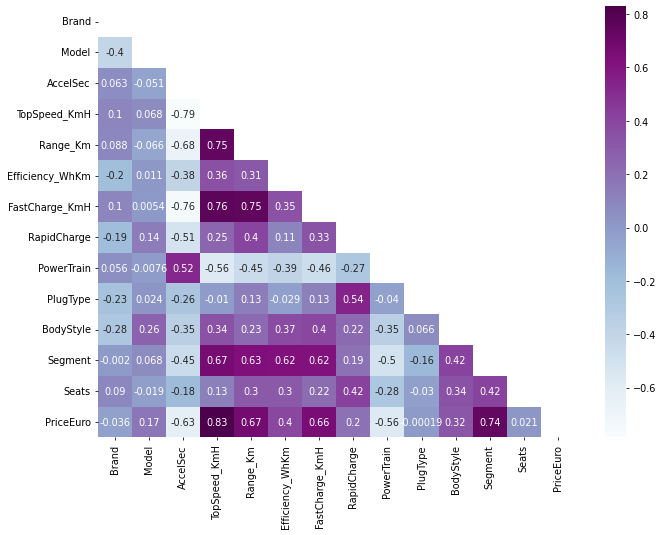

In [ ]:
plt.figure(figsize=(11,8),dpi=70)
corr=df2.corr()
mask=np.triu(np.ones_like(corr,dtype=bool))
sns.heatmap(corr,annot=True,mask=mask,cmap='BuPu')
plt.show()
df2=df2.drop(index=[57,68,77,82,91],axis=1)
df2=df2.astype(int)

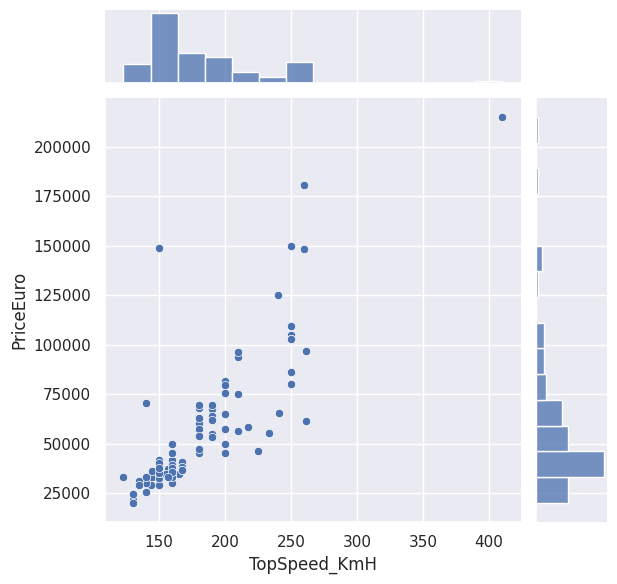

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})
sns.jointplot(x='TopSpeed_KmH',y='PriceEuro',data=df2)
plt.show()

<a id="section-three-one"></a>
## <b><span style='color:#f5429b'> 3-1. |</span> Linear Regression

Regressão linear é um tipo de análise de regressão que prevê o valor de uma variável dependente com outra variável independente. Ela estima os coeficientes de uma equação linear envolvendo variáveis ​​independentes que melhor predizem a variável dependente.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score
import scipy as sp

In [ ]:
X=df2.drop('PriceEuro',axis=1)
y=df2['PriceEuro']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=42)

In [ ]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
test_predictions=lr.predict(X_test)

In [ ]:
print(f'Train Score:{lr.score(X_train,y_train)}')
print(f'Test Score:{lr.score(X_test,y_test)}')

Train Score:0.8843602158701857
Test Score:0.710643183563752


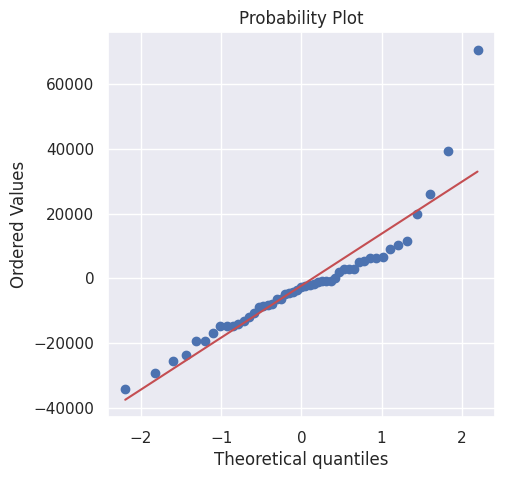

In [ ]:
test_res=y_test-test_predictions

fig,ax=plt.subplots(figsize=(5,5))
_=sp.stats.probplot(test_res,plot=ax)

<a id="section-three-three"></a>
## <b><span style='color:#f5429b'> 3-2. |</span> Random Forest Regression

Random Forest é um metaestimador que ajusta uma série de árvores de decisão de classificação em várias subamostras do conjunto de dados e usa a média para melhorar a precisão preditiva e controlar o overfitting.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfg=RandomForestRegressor(n_jobs=-1,random_state=42)
rfg.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [ ]:
test_predictions=rfg.predict(X_test)

In [ ]:
print(f'train score:{rfg.score(X_train,y_train)}')
print(f'test score:{rfg.score(X_test,y_test)}')

train score:0.9425223026926737
test score:0.8439157875983575


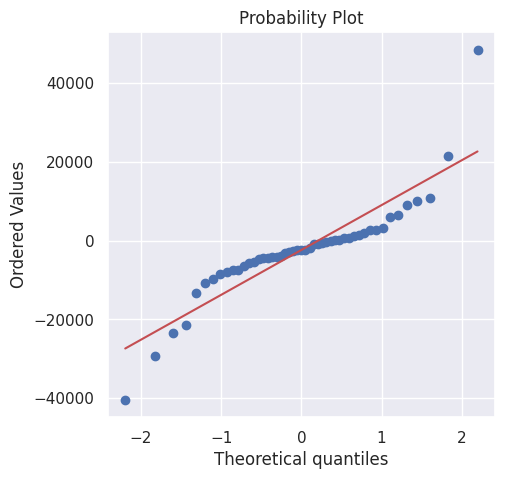

In [ ]:
test_res=y_test-test_predictions

fig,ax=plt.subplots(figsize=(5,5))
_=sp.stats.probplot(test_res,plot=ax)

<a id="section-three-four"></a>
## <b><span style='color:#f5429b'> 3-3. |</span> Gradient Boosting Regression

Gradient boosting é baseada na ideia de um método de ensemble derivado de uma árvore de decisão, combinando sequencialmente muitos learners fracos para formar um learner forte.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gbr=GradientBoostingRegressor(random_state=42)
gbr.fit(X_train,y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
test_predictions=gbr.predict(X_test)

In [ ]:
print(f'Train Score:{gbr.score(X_train,y_train)}')
print(f'Test Score:{gbr.score(X_test,y_test)}')

Train Score:0.9999267674469171
Test Score:0.8384606423805372


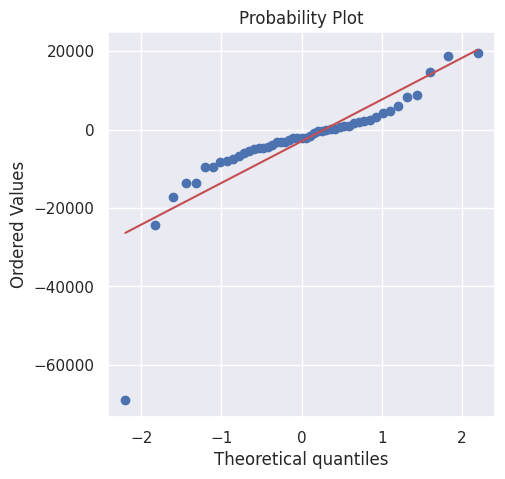

In [ ]:
test_res=y_test-test_predictions

fig,ax=plt.subplots(figsize=(5,5))
_=sp.stats.probplot(test_res,plot=ax)

<a id="section-three-five"></a>
## <b><span style='color:#f5429b'> 3-4. |</span> XGBoost Regression

XGBoost é uma ferramenta poderosa para aprendizado de máquina, projetada para velocidade, facilidade de uso e desempenho em grandes conjuntos de dados. Ele ajuda a construir modelos melhores e funciona combinando árvores de decisão e gradient boosting.

In [ ]:
import xgboost as xgb

xgb_r=xgb.XGBRegressor(objective='reg:linear',n_estimators=300,seed=123)
xgb_r.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
test_predictions=xgb_r.predict(X_test)

In [ ]:
print(f'Train Score:{xgb_r.score(X_train,y_train)}')
print(f'Test Score:{xgb_r.score(X_test,y_test)}')

Train Score:1.0
Test Score:0.7059780359268188


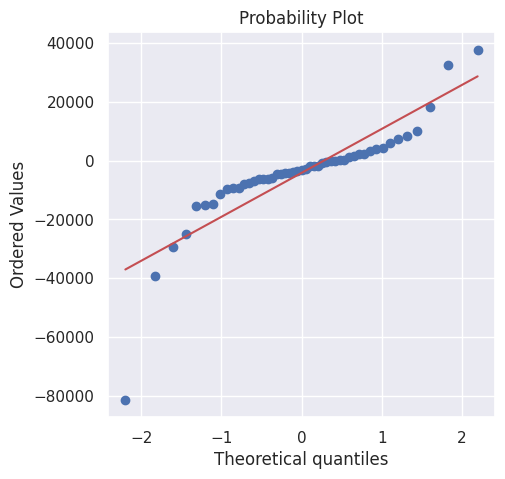

In [ ]:
test_res=y_test-test_predictions

fig,ax=plt.subplots(figsize=(5,5))
_=sp.stats.probplot(test_res,plot=ax)

- XGBRegressor got the highest test score in this data which is 0.83.

<a id="section-three-six"></a>
## <b><span style='color:#f5429b'> 3-5. |</span> XGBoost Bagging Regression

Bagging é uma técnica de ensemble usada para reduzir a variância das previsões combinando o resultado de vários classificadores modelados em diferentes subamostras do mesmo conjunto de dados.

In [ ]:
from sklearn.ensemble import BaggingRegressor

In [ ]:
bag_reg=BaggingRegressor(estimator=xgb.XGBRegressor(),n_estimators=100,random_state=0)

In [ ]:
bag_reg.fit(X_train,y_train)

BaggingRegressor(estimator=XGBRegressor(base_score=None, booster=None,
                                        callbacks=None, colsample_bylevel=None,
                                        colsample_bynode=None,
                                        colsample_bytree=None, device=None,
                                        early_stopping_rounds=None,
                                        enable_categorical=False,
                                        eval_metric=None, feature_types=None,
                                        feature_weights=None, gamma=None,
                                        grow_policy=None, importance_type=None,
                                        interaction_constraints=None,
                                        learning_rate=None, max_bin=None,
                                        max_cat_threshold=None,
                                        max_cat_to_onehot=None,
                                        max_delta_step=None, max_depth=None,
                                        max_leaves=None, min_child_weight=None,
                                        missing=nan, monotone_constraints=None,
                                        multi_strategy=None, n_estimators=None,
                                        n_jobs=None, num_parallel_tree=None, ...),
                 n_estimators=100, random_state=0)

In [ ]:
test_predictions=bag_reg.predict(X_test)

In [ ]:
print(f'Train Score:{bag_reg.score(X_train,y_train)}')
print(f'Test Score:{bag_reg.score(X_test,y_test)}')

Train Score:0.9529569745063782
Test Score:0.8452435731887817


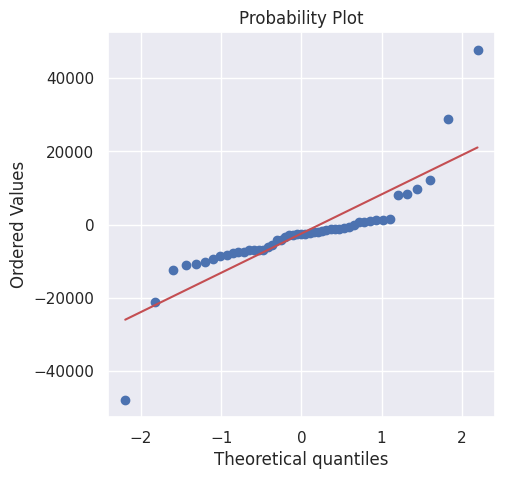

In [ ]:
test_res=y_test-test_predictions

fig,ax=plt.subplots(figsize=(5,5))
_=sp.stats.probplot(test_res,plot=ax)

<a id="section-three-eight"></a>
## <b><span style='color:#f5429b'> 3-6. |</span> CatBoost Regression

CatBoost se baseia na teoria de árvores de decisão e no gradient boosting. A ideia principal é combinar sequencialmente muitos modelos fracos e, assim, criar um modelo preditivo competitivo robusto. O CatBoost lida eficientemente com características categóricas e particularmente bem com conjuntos de dados desbalanceados ou pequenos.

In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.5 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor

In [ ]:
cb_reg=CatBoostRegressor(random_seed=0,verbose=200,depth=5,iterations=300)
cb_reg.fit(X_train,y_train)

Learning rate set to 0.06766
0:	learn: 35641.8056938	total: 56.8ms	remaining: 17s
200:	learn: 1982.3077813	total: 238ms	remaining: 117ms
299:	learn: 633.0939265	total: 325ms	remaining: 0us


In [ ]:
test_predictions=cb_reg.predict(X_test)

In [ ]:
print(f'train score:{cb_reg.score(X_train,y_train)}')
print(f'test score:{cb_reg.score(X_test,y_test)}')

train score:0.9996983897558915
test score:0.9131155992389846


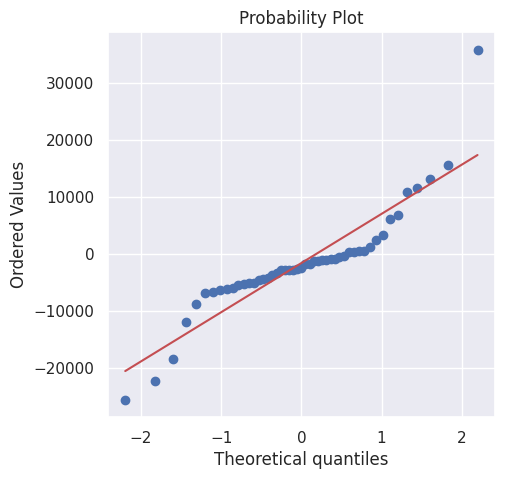

In [ ]:
test_res=y_test-test_predictions

fig,ax=plt.subplots(figsize=(5,5))
_=sp.stats.probplot(test_res,plot=ax)

In [ ]:
y_pred = cb_reg.predict(X_test)
results = pd.DataFrame({
    "True (€)": y_test.values,
    "Predicted (€)": np.round(y_pred, 2)
}).reset_index(drop=True)
print(results)

    True (€)  Predicted (€)
0      75351       63755.50
1      79990       85038.07
2      96050       85136.94
3      30000       36845.73
4      34900       34498.09
5      69551       75896.23
6     109302      127730.63
7      81639       82957.36
8      69484       62596.27
9      55480       60577.39
10     38105       40922.46
11     54000       59235.35
12    102945      114940.31
13     33000       39191.98
14     20129       24796.46
15     32997       34060.61
16     35000       36002.60
17     40795       41119.25
18     35575       38452.90
19     34400       33917.40
20     36057       42825.99
21    150000      136888.93
22     41526       38297.10
23     40936       43361.62
24     45000       50964.54
25     75000      100612.46
26     55000       58436.07
27     70631       55029.50
28     29234       38017.68
29     33246       55584.83
30     45000       38874.48
31     67358       71591.34
32     38017       36892.81
33     57500       59202.32
34    105000      10

### **Test Scores:**

In [ ]:
print(f'Linear Regression: {round(lr.score(X_test,y_test),3)}')
print(f'Random Forest Regression: {round(rfg.score(X_test,y_test),3)}')
print(f'Gradient Boosting Regression: {round(gbr.score(X_test,y_test),3)}')
print(f'XGBoost Regression: {round(xgb_r.score(X_test,y_test),3)}')
print(f'XGBoost Bagging Regression: {round(bag_reg.score(X_test,y_test),3)}')

print(f'CatBoost Regression: {round(cb_reg.score(X_test,y_test),3)}')

Linear Regression: 0.711
Random Forest Regression: 0.844
Gradient Boosting Regression: 0.838
XGBoost Regression: 0.706
XGBoost Bagging Regression: 0.845
CatBoost Regression: 0.913


<a id="section-four"></a>
# <b><span style='color:#f5429b'> 4. |</span> Conclusão





Após avaliar seus modelos, considere os valores de R² (coeficiente de determinação) obtidos nos conjuntos de treinamento e teste e responda:

a) Qual modelo apresentou o melhor desempenho geral? Obs: Não é necessário usar outras métricas neste momento. O foco é praticar a interpretação do coeficiente de determinação.
O CatBoost Regression teve o maior desempenho

b) Algum modelo teve diferença muito grande entre treino e teste?
o XGBoost Regression teve uma diferença de aproximadamente 0,3 ou 30% entre o treino e teste

c) Por que você acha que o modelo com melhor desempenho conseguiu esse resultado?
Pelo execelente domínio com as variáveis categóricas